#Algorithmic Toolbox – Week 4 – Divide and Conquer



##4-1: Binary Search

In [ ]:
#include <bits/stdc++.h>
#include <stdlib.h>

using namespace std;

long long binary_search(vector<long long> &a, long long b_i, long long low, long long high){
    if(high < low){
        return -1LL;
    }
    long long mid = low + (high - low) / 2LL;
    if(a[mid] == b_i){
        return mid;
    }else if(a[mid] > b_i){
        return binary_search(a, b_i, low, mid - 1LL);
    }else{
        return binary_search(a, b_i, mid + 1LL, high);
    }
}

int main(){
    long long n;
    cin >> n;
    vector<long long> a(n);
    for(long long i = 0; i < n; i++){
        cin >> a[i];
    }
    long long k;
    cin >> k;
    vector<long long> b(k);
    for(long long i = 0; i < k; i++){
        cin >> b[i];
    }

    for(long long i = 0; i < k; i++){
        cout << binary_search(a, b[i], 0LL, n - 1LL) << ' ';
    }
    
    return 0;
}

##4-2: Majority Element

In [ ]:
#include <bits/stdc++.h>

using namespace std;

int majory_element(vector<long long> &a){
    sort(a.begin(), a.end());
    int index = 0;
    int majory_size = a.size() / 2 + 1;
    int max_posibility = a.size() % 2 == 0 ? a.size()/2 - 1 : a.size() / 2;
    while(index <= max_posibility){
        if(a[index + majory_size] != a[index] && a[index + majory_size - 1] == a[index]){
            return 1;
        }
        index++;
    }
    return 0;
}

int main(){
    int n;
    cin >> n;
    vector<long long> a(n);
    for(int i = 0; i < n; i++){
        cin >> a[i];
    }
    cout << majory_element(a) << endl;
    return 0;
}


##4-3: Improving Quick Sort

In [ ]:
#include <bits/stdc++.h>

using namespace std;

pair<int, int> partition(vector<long long> &a, int start, int end){ 
    long long pivot = a[start];
    int j = start;
    stack<int> positions;
    for (int i = start + 1; i <= end; i++) { 
        if (a[i] < pivot) { 
            j++;
            swap(a[i], a[j]);
        }else if(a[i] == pivot){
            j++;
            swap(a[i], a[j]);
            positions.push(j);
        }
    } 
    int k = j;
    while(positions.size() > 0){
        if(a[k] != pivot){
            swap(a[k], a[positions.top()]);
        }
        k--;
        positions.pop();
    }
    swap(a[start], a[k]);
    return make_pair(k, j); 
} 

void improving_quick_sort(vector<long long> &a, int start, int end){
    if (start < end) {
        int pivot = start + rand() % (end - start + 1);
        swap(a[start], a[pivot]);
        pair<int, int> indexes = partition(a, start, end); 
        improving_quick_sort(a, start, indexes.first - 1); 
        improving_quick_sort(a, indexes.second + 1, end); 
    } 
}

int main(){
    int n;
    cin >> n;
    vector<long long> a(n);
    for(int i = 0; i < n; i++){
        cin >> a[i];
    }
    improving_quick_sort(a, 0, n - 1);
    for(int i = 0; i < n; i++){
        cout << a[i] << ' ';
    }
    cout << endl;
    return 0;
}

##4-6: Closets Points

In [ ]:
#include <stdlib.h>
#include <stdio.h>
#include <limits.h>
#include <math.h>

typedef struct point
{
    double x;
    double y;
} point;

#define min(a, b) ((a) < (b) ? (a) : (b))
#define MAX_DIST UINT_MAX

double
minimal_distance(const point *, const point *);
const point *
middle_range(const point *, const point *, const point *, double,
             unsigned int *);
double
minimal_distance_naive(const point *, const point *);
double
distance(const point *, const point *);
void sort_by_x(point *, const point *);
int compare_by_x(const point *, const point *);
void sort_by_y(point *, const point *);
int compare_by_y(const point *, const point *);
void scan(point *, point *);
void print(const point *, const point *);
void stress_test(unsigned int);

int main()
{
#if defined(STRESS_TEST)
    stress_test(0);
#else
    unsigned long n;
    point *points;
    double dist;

    scanf("%lu", &n);
    points = malloc(n * sizeof(point));
    scan(&points[0], &points[n - 1]);
    sort_by_x(&points[0], &points[n - 1]);
    dist = minimal_distance(&points[0], &points[n - 1]);
    printf("%.6lf\n", dist);
    free(points);
    return 0;
#endif
}

/*
 * minimal_distance: finds the smallest distance between a pair of two points 
 * of the sequence *left <= ... <= *right.
 */
double
minimal_distance(const point *left, const point *right)
{
    const point *middle, *lower_middle, *upper_middle, *p1, *p2;
    double dist, dist_lt, dist_rt, dist_mid;
    unsigned int nel;

    if (right - left < 1)
        return MAX_DIST;
    if (right - left == 1)
        return distance(left, right);
    middle = left + (right - left) / 2;
    dist_lt = minimal_distance(left, middle);
    dist_rt = minimal_distance(middle + 1, right);
    dist = min(dist_lt, dist_rt);
    /* checks whether there exist points in the left and the right side such that 
    the distance between them is smaller than dist */
    lower_middle = middle_range(left, right, middle, dist, &nel);
    if (nel > 1)
    {
        upper_middle = lower_middle + nel - 1;
        sort_by_y((point *)lower_middle, (point *)upper_middle);
        p1 = lower_middle;
        while (p1 < upper_middle)
        {
            p2 = p1 + 1;
            while (p2 <= upper_middle && (p2 - p1) <= 7)
            {
                dist_mid = distance(p1, p2);
                if (dist_mid < dist)
                    dist = dist_mid;
                p2++;
            }
            p1++;
        }
        sort_by_x((point *)lower_middle, (point *)upper_middle);
    }
    return dist;
}



/*
 * middle_range: returns a pointer to the left endpoint of the sequence (middle->x - radius)
 * <= *middle_range <= ... <= (*middle_range + *nel - 1) <=  (middle->x + radius).
 */
const point *
middle_range(const point *left, const point *right, const point *middle, double radius,
             unsigned int *nel)
{
    const point *p;
    double lt_endpoint, rt_endpoint;

    lt_endpoint = middle->x - radius;
    rt_endpoint = middle->x + radius;
    while (middle > left)
        if ((middle - 1)->x >= lt_endpoint)
            middle--;
        else
            break;
    p = middle;
    while (p < right)
        if ((p + 1)->x <= rt_endpoint)
            p++;
        else
            break;
    *nel = p - middle + 1;
    return middle;
}

double
minimal_distance_naive(const point *left, const point *right)
{
    const point *p1, *p2;
    double dist, tmp;

    if (right - left < 1)
        return MAX_DIST;
    if (right - left == 1)
        return distance(left, right);
    dist = MAX_DIST;
    p1 = left;
    while (p1 <= right)
    {
        p2 = left;
        while (p2 <= right)
        {
            if (p1 != p2)
            {
                tmp = distance(p1, p2);
                if (tmp < dist)
                    dist = tmp;
            }
            p2++;
        }
        p1++;
    }
    return dist;
}

double
distance(const point *a, const point *b)
{
    return sqrt(pow(a->x - b->x, 2) + pow(a->y - b->y, 2));
}

void sort_by_x(point *left, const point *right)
{
    qsort(left, right - left + 1, sizeof(point),
          (int (*)(const void *, const void *))compare_by_x);
}

int compare_by_x(const point *a, const point *b)
{
    if (a->x < b->x)
        return -1;
    else if (a->x == b->x)
        return 0;
    else
        return 1;
}

void sort_by_y(point *left, const point *right)
{
    qsort(left, right - left + 1, sizeof(point),
          (int (*)(const void *, const void *))compare_by_y);
}

int compare_by_y(const point *a, const point *b)
{
    if (a->y < b->y)
        return -1;
    else if (a->y == b->y)
        return 0;
    else
        return 1;
}

void scan(point *left, point *right)
{
    while (left <= right)
    {
        scanf("%lf %lf", &(left->x), &(left->y));
        left++;
    }
}

void print(const point *left, const point *right)
{
    while (left <= right)
    {
        printf("(%.0lf, %.0lf)\n", left->x, left->y);
        left++;
    }
}

##Juez Virtual Coursera

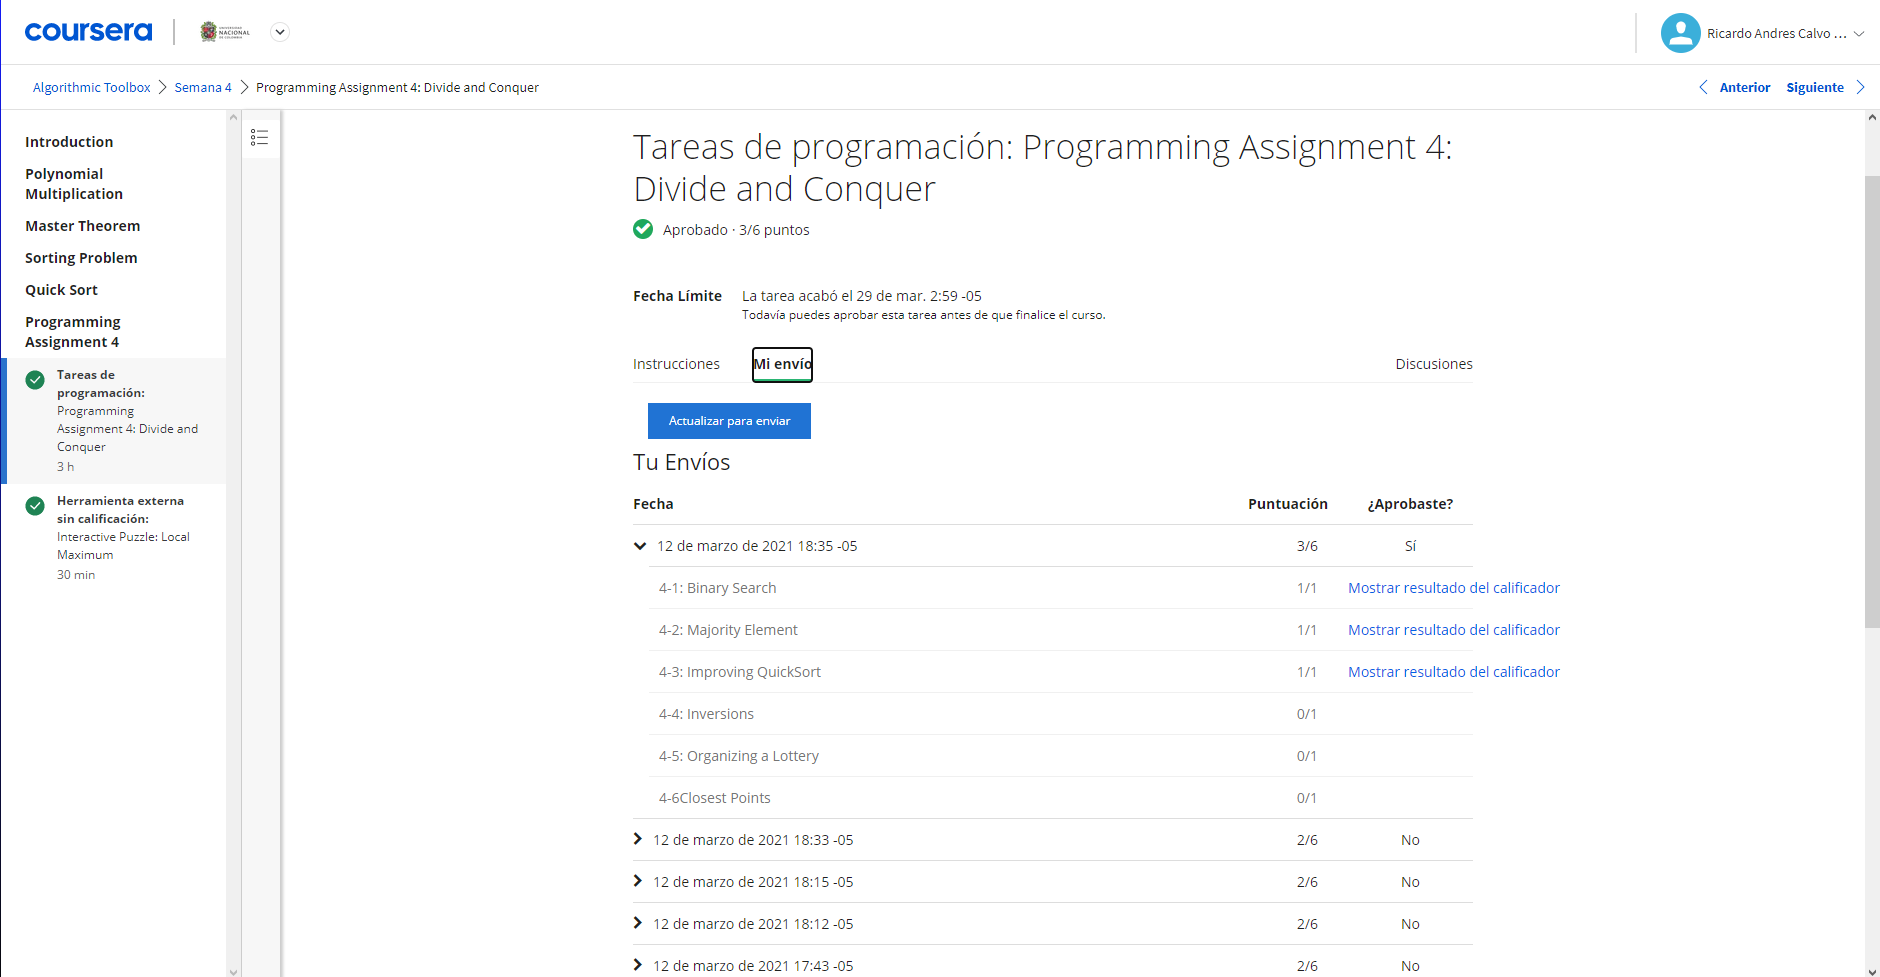

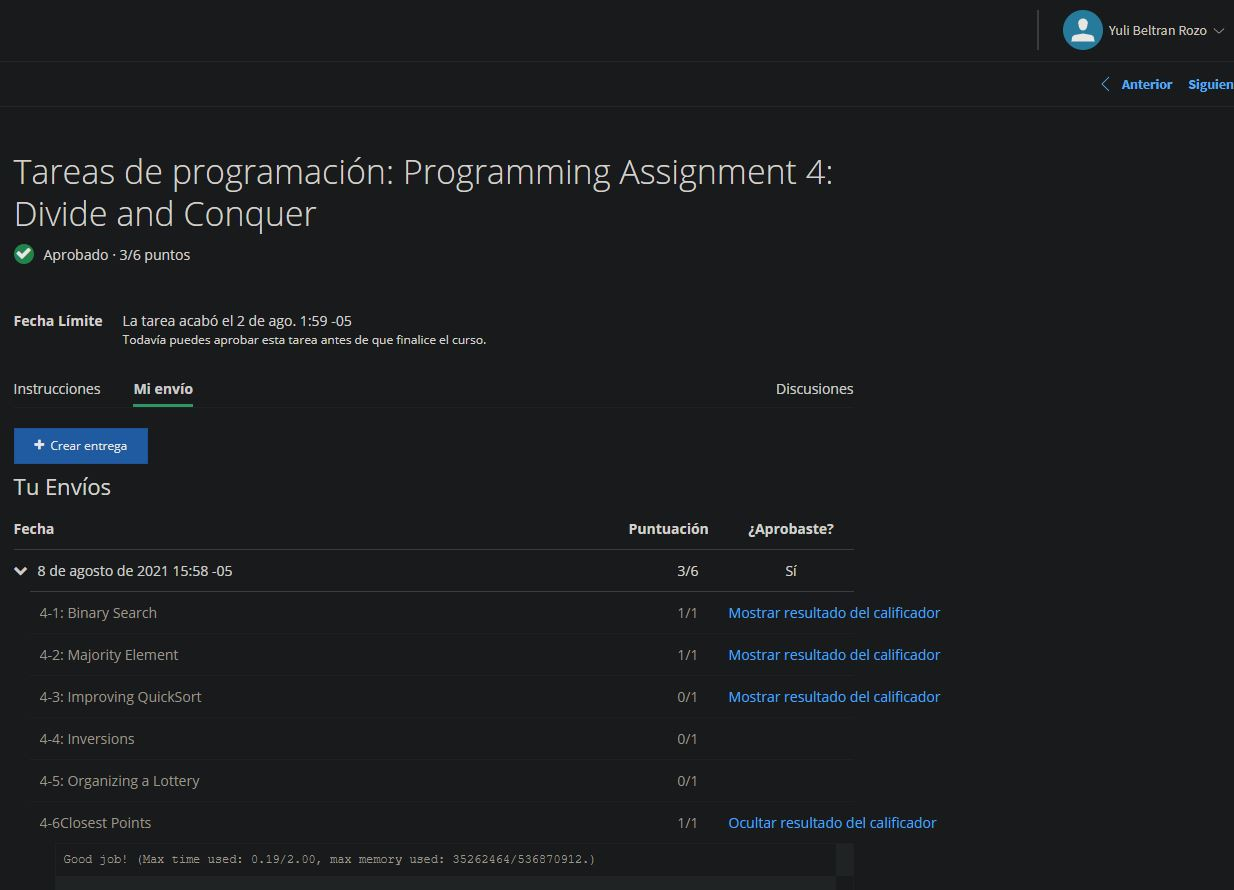